<b><i>Matplotlib basemap toolkit:</i></b><br>
Rather low resolution. Long load time. Can read shapefiles directly (in wgs84 coordinates) without going through fiona/shapely/geopandas. Large number of projections available

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

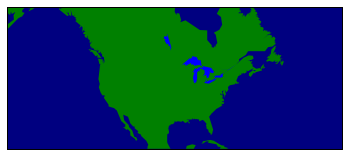

In [2]:
# setup basemap in mercator projection.
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=60,
            llcrnrlon=-160,urcrnrlon=-30,resolution='c')    #adjust map resolution from crude to high
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='navy')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='green',lake_color='blue')
plt.show()

Pre set tiles are available

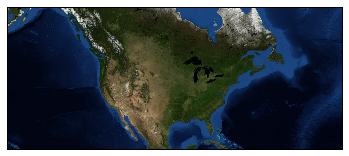

In [3]:
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=60,
            llcrnrlon=-160,urcrnrlon=-30)    #adjust map resolution from crude to high
m.bluemarble()
plt.show()

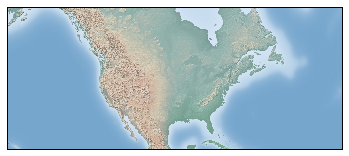

In [4]:
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=60,
            llcrnrlon=-160,urcrnrlon=-30)    #adjust map resolution from crude to high
m.shadedrelief()
plt.show()

Adding matplotlib elements to the basemap

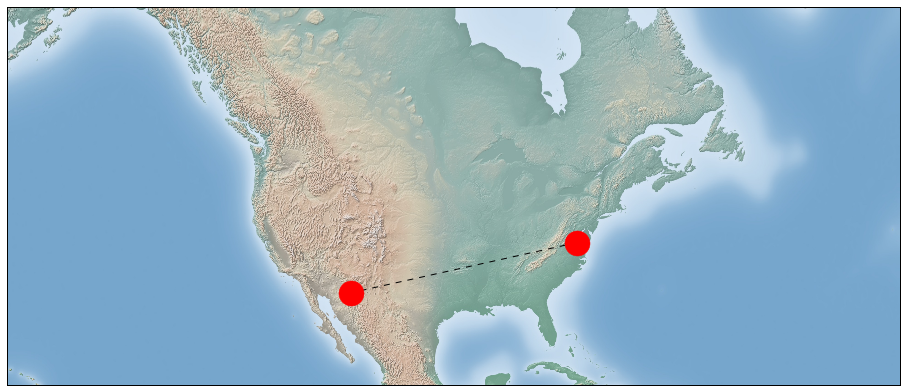

In [5]:
plt.figure(figsize=(16,8))
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=60,
            llcrnrlon=-160,urcrnrlon=-30)    #adjust map resolution from crude to high
m.shadedrelief()
# Tucson/ DC coordinates (in wgs84)
lat = [38, 32]
lon = [-77, -110]
# compute native map projection coordinates of lat/lon grid.
x, y = m(lon, lat)
m.plot(x,y,'--',c='k')
m.plot(x,y,'.r',markersize=50)
plt.show()

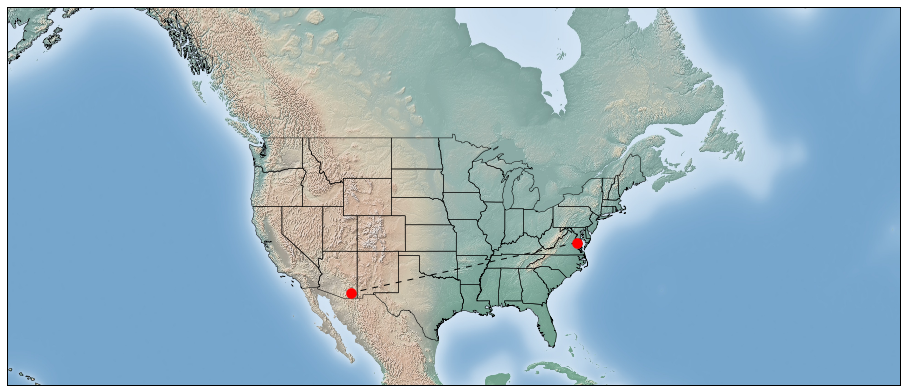

In [6]:
plt.figure(figsize=(16,8))
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=60,
            llcrnrlon=-160,urcrnrlon=-30)    #adjust map resolution from crude to high
m.shadedrelief()
# Tucson/ DC coordinates (in wgs84)
lat = [38, 32]
lon = [-77, -110]
# compute native map projection coordinates of lat/lon grid.
x, y = m(lon, lat)
m.plot(x,y,'--',c='k')
m.plot(x,y,'.r',markersize=20)
m.readshapefile('/home/gilles/projects/datasets/US_states/states', 'states shapefile')
plt.show()

For higher resolution maps, basemaps from ESRI can be used instead, using arcgisimage api (very long loading time)<br>
(make sure the lower left and upper right corner coordinates are correct)

In [11]:
# let's first define a helper function to plot a map of DC area. 
def plot_map(service = 'World_Physical_Map', epsg = 4269, xpixels = 5000, res='l'):
    # epsg changes for different region, US is 4269
    plt.figure(figsize = (6, 6))
    m = Basemap(projection='mill',llcrnrlon=-78 ,llcrnrlat=37,
        urcrnrlon=-76 ,urcrnrlat=40, resolution = res, epsg = epsg)    
    # xpixels controls the pixels in x direction, and if you leave ypixels
    # None, it will choose ypixels based on the aspect ratio
    m.arcgisimage(service=service, xpixels = xpixels, verbose= False)
    plt.show()

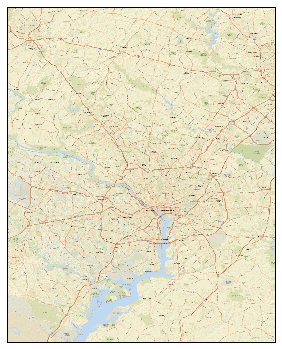

In [9]:
plot_map(service = 'World_Street_Map')